# Pier & Co Services Ltd Aviation Analysis Project.

# Objectives:
1) Evaluate the correlation between the features within the dataset. 
2) Establish the current trends in fatal accidents between the period (2000 - 2022).
3) Determine which aircraft Pier & Co Services Ltd should invest in while they venture into the air transport business. 





# Summmary

Pier & Co Service Ltd is seeking to venture into the aviation industry, however, the company seeks insights that will inform their decisions about their new venture. 

The following data analysis process will include the use of python libraries including pandas, numpy, matplotlib and seaborn, aiming to provide accurate information as to how specific factors contribute to aviation accidents. The factors to be analyzed are limited to the features provided in the  AviationData.csv dataset. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv("AviationData.csv/AviationData.csv", encoding = "latin1", low_memory=False) 

df.head()


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [3]:
df.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

# Definition of aviation term:

FAR.Description (Federal Aviation Regulations)- According to https://www.lawinsider.com/dictionary/federal-aviation-regulation-far , FAR is the body of rules prescribed by the Federal Aviation Authority(FAA) governing all aviation activities in the United States. Therefore, the applicable description(parts of the rules) is dependent on the type of aircraft.

# Data cleaning and Analysis Process

First pick the columns to be featured and analyzed 


In [5]:
select_df = df[["Event.Date","Location", "Country", "Weather.Condition","Aircraft.damage", "Aircraft.Category", "Make", "Model", "Engine.Type", "Number.of.Engines", "Injury.Severity", "Total.Fatal.Injuries", "Total.Serious.Injuries", "Total.Minor.Injuries", "Total.Uninjured", "FAR.Description", "Broad.phase.of.flight", "Purpose.of.flight"]]

select_df.head()

,Event.Date,Location,Country,Weather.Condition,Aircraft.damage,Aircraft.Category,Make,Model,Engine.Type,Number.of.Engines,Injury.Severity,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,FAR.Description,Broad.phase.of.flight,Purpose.of.flight
0,1948-10-24,"MOOSE CREEK, ID",United States,UNK,Destroyed,NaN,Stinson,108-3,Reciprocating,1.0,Fatal(2),2.0,0.0,0.0,0.0,NaN,Cruise,Personal
1,1962-07-19,"BRIDGEPORT, CA",United States,UNK,Destroyed,NaN,Piper,PA24-180,Reciprocating,1.0,Fatal(4),4.0,0.0,0.0,0.0,NaN,Unknown,Personal
2,1974-08-30,"Saltville, VA",United States,IMC,Destroyed,NaN,Cessna,172M,Reciprocating,1.0,Fatal(3),3.0,NaN,NaN,NaN,NaN,Cruise,Personal
3,1977-06-19,"EUREKA, CA",United States,IMC,Destroyed,NaN,Rockwell,112,Reciprocating,1.0,Fatal(2),2.0,0.0,0.0,0.0,NaN,Cruise,Personal
4,1979-08-02,"Canton, OH",United States,VMC,Destroyed,NaN,Cessna,501,NaN,NaN,Fatal(1),1.0,2.0,NaN,0.0,NaN,Approach,Personal


In [6]:
select_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Date              88889 non-null  object 
 1   Location                88837 non-null  object 
 2   Country                 88663 non-null  object 
 3   Weather.Condition       84397 non-null  object 
 4   Aircraft.damage         85695 non-null  object 
 5   Aircraft.Category       32287 non-null  object 
 6   Make                    88826 non-null  object 
 7   Model                   88797 non-null  object 
 8   Engine.Type             81793 non-null  object 
 9   Number.of.Engines       82805 non-null  float64
 10  Injury.Severity         87889 non-null  object 
 11  Total.Fatal.Injuries    77488 non-null  float64
 12  Total.Serious.Injuries  76379 non-null  float64
 13  Total.Minor.Injuries    76956 non-null  float64
 14  Total.Uninjured         82977 non-null

# First Objective:
Demonstrate the correlation between the number of accidents and the following features; Aircraft.Damage, Injury.Severity, Engine.Type, Number of Engines, FAR.Description, Purpose.of.Flight, "Weather.Condition, Make , Broad.phase.of.flight and Aircraft.Category. 

This is easily demonstrated by histogram charts.

In [7]:
hist_features = ["Aircraft.damage", "Purpose.of.flight", "Engine.Type", "Number.of.Engines", "FAR.Description", 
                 "Weather.Condition", "Broad.phase.of.flight", "Aircraft.Category"]

hist_obj =[x  for x in hist_features if select_df[x].dtypes == 'object']
hist_num =[x  for x in hist_features if select_df[x].dtypes != 'object']

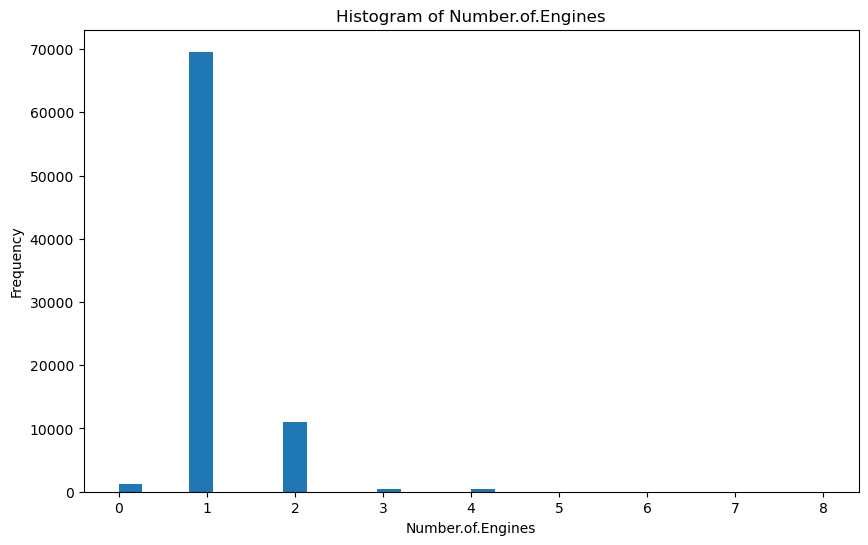

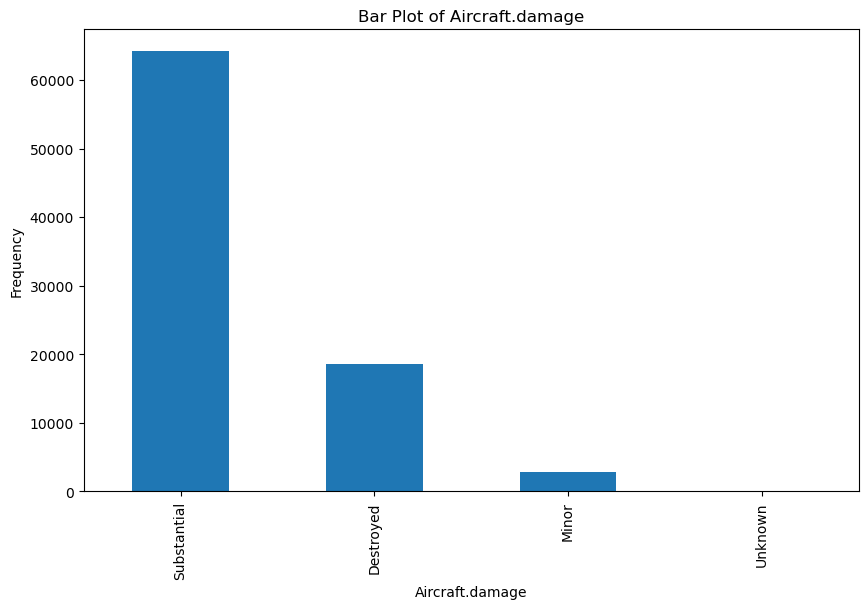

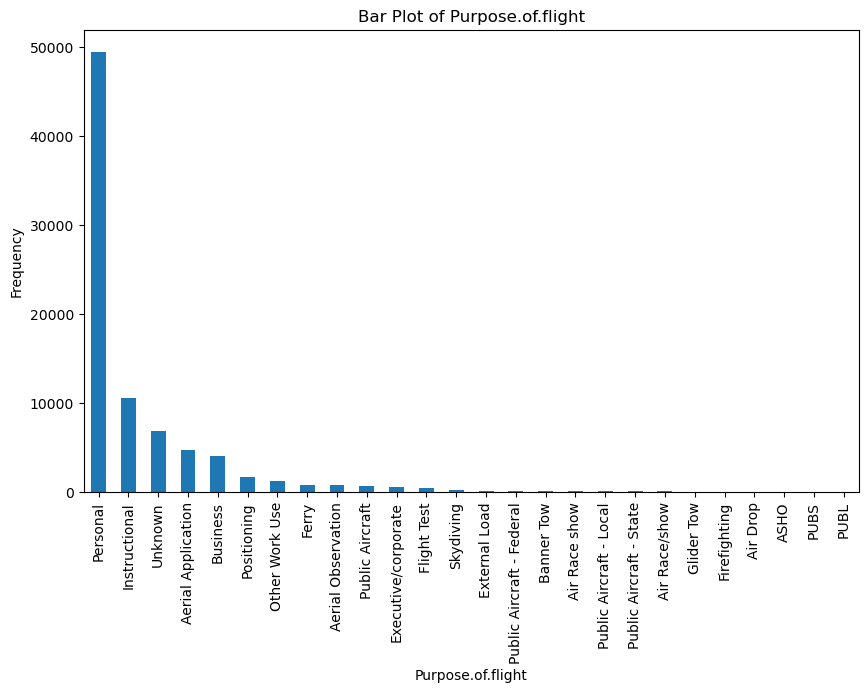

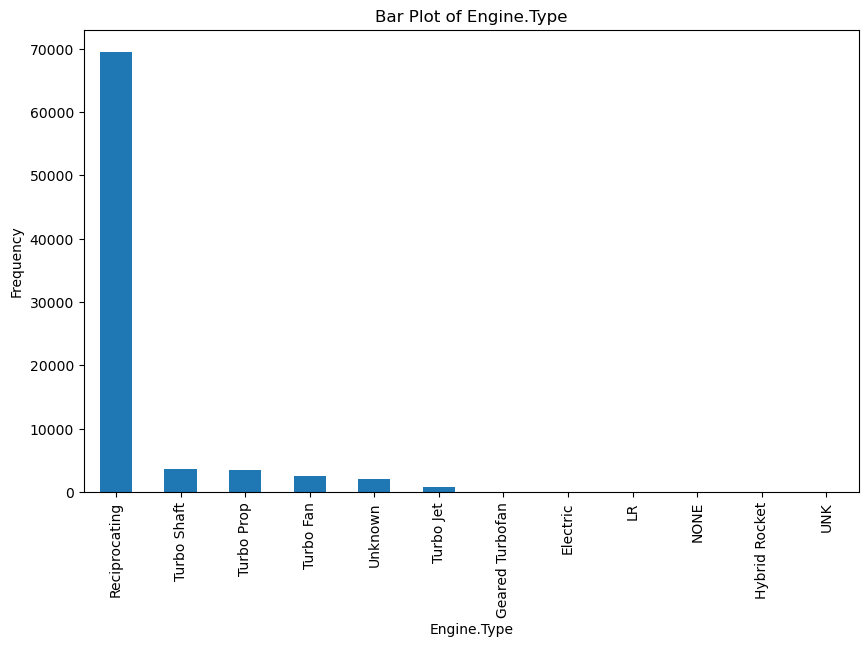

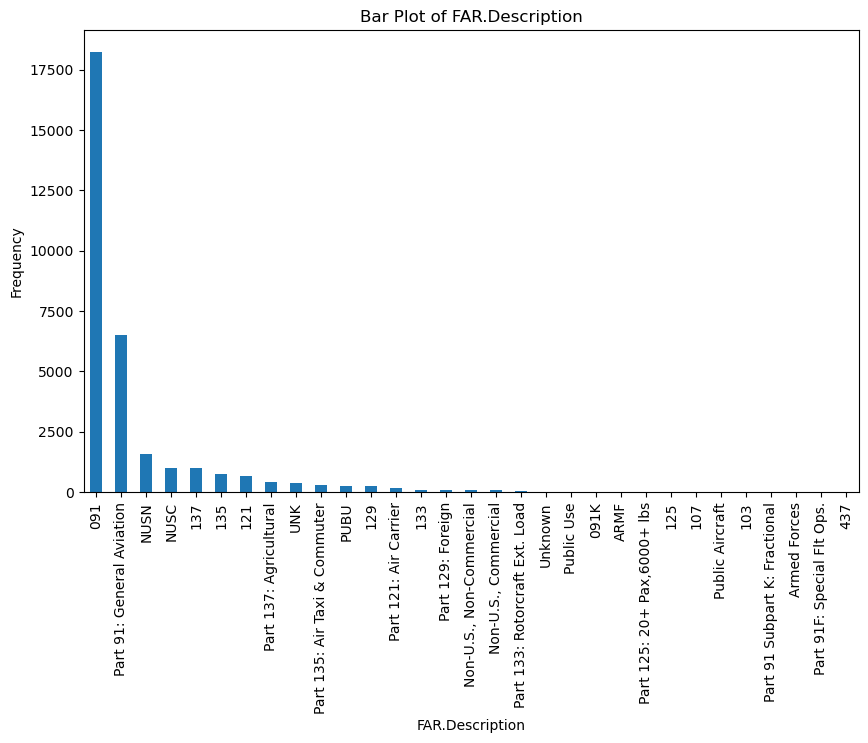

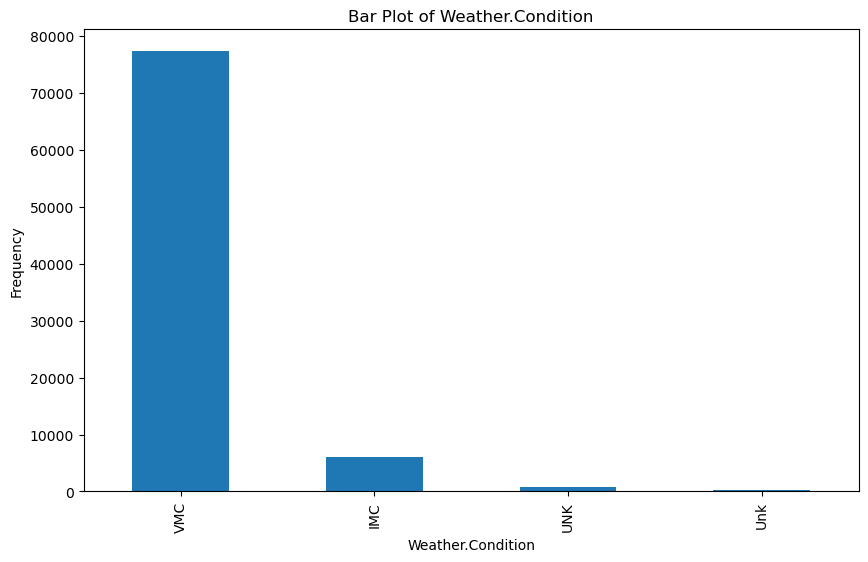

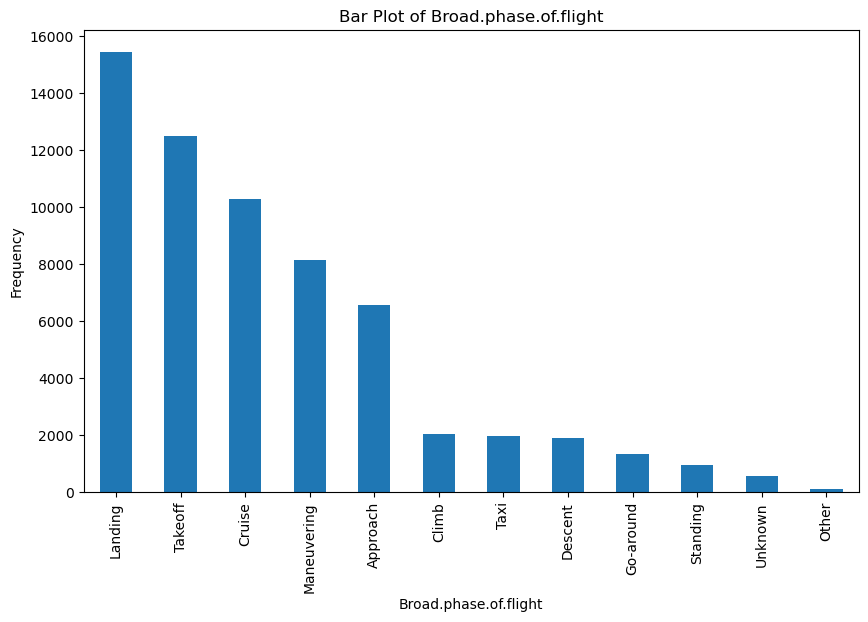

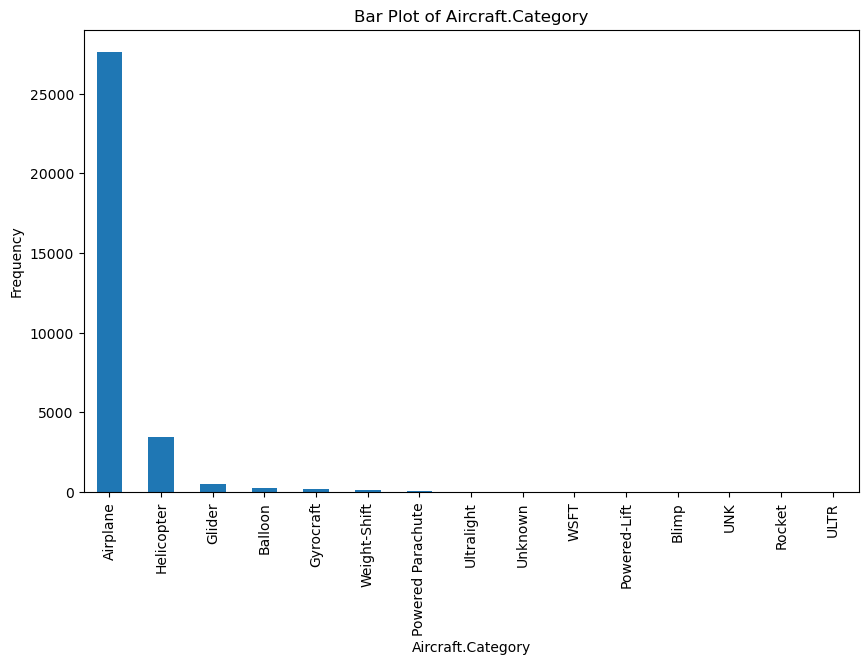

In [8]:
#drawing the histograms
for feature in hist_num:
    plt.figure(figsize=(10, 6))
    select_df[feature].plot(kind='hist', bins=30, title=f'Histogram of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

# Plot bar plots for categorical features
for feature in hist_obj:
    plt.figure(figsize=(10, 6))
    select_df[feature].value_counts().plot(kind='bar', title=f'Bar Plot of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

Observations

From the charts above comparing the frequency of accidents to each respective selected feature between 1948 - 2022, the following are the derived observations ;
1) Aircrafts with just 1 engine have higher numbers of accidents in comparison to those with 2,3 & 4 number of engines.
2) The frequency of accidents in relation to the purpose of flight, it can be observed that the personal and instructional bins have significant numbers in comparison to the others.
3) The FAR.Description chart, demonstrates that 91 & part 091 (civil aircrafts) are majorly affected when it comes to accidents.
4) Referencing the last 2 charts, it is observable that most of the accidents occur during landing and the highest category affected are airplanes followed by helicopters.
5) One outstanding observation is that many accidents occur during VMC which translates to good weather patterns in accordance with visual flight rules. 

# Second Objective:
To get a more current and accurate analysis, filtering the dataset to reflect recent data collected between the year 2000 - 2022

In [9]:
# Extract the year from the date format in the dataset 
select_df["Event.Date"] = pd.to_datetime(select_df["Event.Date"])

select_df.loc[:, "year"] = select_df["Event.Date"].dt.year

C:\Users\User\AppData\Local\Temp\ipykernel_10116\112988020.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  select_df["Event.Date"] = pd.to_datetime(select_df["Event.Date"])
C:\Users\User\AppData\Local\Temp\ipykernel_10116\112988020.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  select_df.loc[:, "year"] = select_df["Event.Date"].dt.year


In [10]:
# To avoid errors transform the year column to an integer format

select_df["year"] = select_df["year"].astype(int)

# Filter the dataframe to the years 2000 -2022

selected_df = select_df[(select_df["year"] >= 2000) & (select_df["year"]<= 2022)]

# Confirming the change has been effected

selected_df.info()



<class 'pandas.core.frame.DataFrame'>
Index: 41214 entries, 47675 to 88888
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Event.Date              41214 non-null  datetime64[ns]
 1   Location                41198 non-null  object        
 2   Country                 41198 non-null  object        
 3   Weather.Condition       36747 non-null  object        
 4   Aircraft.damage         39146 non-null  object        
 5   Aircraft.Category       28406 non-null  object        
 6   Make                    41159 non-null  object        
 7   Model                   41146 non-null  object        
 8   Engine.Type             34135 non-null  object        
 9   Number.of.Engines       36267 non-null  float64       
 10  Injury.Severity         40214 non-null  object        
 11  Total.Fatal.Injuries    30131 non-null  float64       
 12  Total.Serious.Injuries  29120 non-null  float64

C:\Users\User\AppData\Local\Temp\ipykernel_10116\2845049137.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  select_df["year"] = select_df["year"].astype(int)


Given the presence of missing values in the selected dataset, choosing to fill the null values with ("unknown") is a good strategy as it does not disrupt the dataset and avoid undue bias.


In [11]:
# select the columns to be filled with "unknown"
columns_to_fill = [
    "Aircraft.Category", "Make", "Location", "Weather.Condition",
    "Country", "Broad.phase.of.flight", "Aircraft.damage",
    "FAR.Description", "Purpose.of.flight", "Model"
]

# Fill the selected columns
selected_df[columns_to_fill] = selected_df[columns_to_fill].fillna("unknown")

selected_df.head()



C:\Users\User\AppData\Local\Temp\ipykernel_10116\680552497.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_df[columns_to_fill] = selected_df[columns_to_fill].fillna("unknown")


,Event.Date,Location,Country,Weather.Condition,Aircraft.damage,Aircraft.Category,Make,Model,Engine.Type,Number.of.Engines,Injury.Severity,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,FAR.Description,Broad.phase.of.flight,Purpose.of.flight,year
47675,2000-01-01,"HOMESTEAD, FL",United States,VMC,Substantial,unknown,Cessna,550,Turbo Fan,2.0,Non-Fatal,0.0,0.0,0.0,3.0,unknown,Cruise,Positioning,2000
47676,2000-01-01,"MONTEAGLE, TN",United States,IMC,Destroyed,unknown,Bellanca,BL-17-30A,Reciprocating,1.0,Fatal(2),2.0,0.0,0.0,0.0,unknown,Cruise,Personal,2000
47677,2000-01-02,"VICTORVILLE, CA",United States,VMC,Substantial,unknown,Cessna,172G,Reciprocating,1.0,Non-Fatal,0.0,0.0,0.0,2.0,unknown,Cruise,Personal,2000
47678,2000-01-02,"DOS PALOS, CA",United States,VMC,Substantial,unknown,Cessna,172A,Reciprocating,1.0,Non-Fatal,0.0,0.0,1.0,0.0,unknown,Cruise,Instructional,2000
47679,2000-01-02,"CORNING, AR",United States,VMC,Substantial,unknown,Piper,PA-46-310P,Turbo Prop,1.0,Non-Fatal,0.0,0.0,0.0,5.0,unknown,Cruise,Personal,2000


In [12]:
selected_df.head()

,Event.Date,Location,Country,Weather.Condition,Aircraft.damage,Aircraft.Category,Make,Model,Engine.Type,Number.of.Engines,Injury.Severity,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,FAR.Description,Broad.phase.of.flight,Purpose.of.flight,year
47675,2000-01-01,"HOMESTEAD, FL",United States,VMC,Substantial,unknown,Cessna,550,Turbo Fan,2.0,Non-Fatal,0.0,0.0,0.0,3.0,unknown,Cruise,Positioning,2000
47676,2000-01-01,"MONTEAGLE, TN",United States,IMC,Destroyed,unknown,Bellanca,BL-17-30A,Reciprocating,1.0,Fatal(2),2.0,0.0,0.0,0.0,unknown,Cruise,Personal,2000
47677,2000-01-02,"VICTORVILLE, CA",United States,VMC,Substantial,unknown,Cessna,172G,Reciprocating,1.0,Non-Fatal,0.0,0.0,0.0,2.0,unknown,Cruise,Personal,2000
47678,2000-01-02,"DOS PALOS, CA",United States,VMC,Substantial,unknown,Cessna,172A,Reciprocating,1.0,Non-Fatal,0.0,0.0,1.0,0.0,unknown,Cruise,Instructional,2000
47679,2000-01-02,"CORNING, AR",United States,VMC,Substantial,unknown,Piper,PA-46-310P,Turbo Prop,1.0,Non-Fatal,0.0,0.0,0.0,5.0,unknown,Cruise,Personal,2000


# Third Objective
Analyzing the selected data

First, get the trajectory of fatalities recorded within the selected period (2000 - 2022) to understand the trend and how risky the sector is currently. 

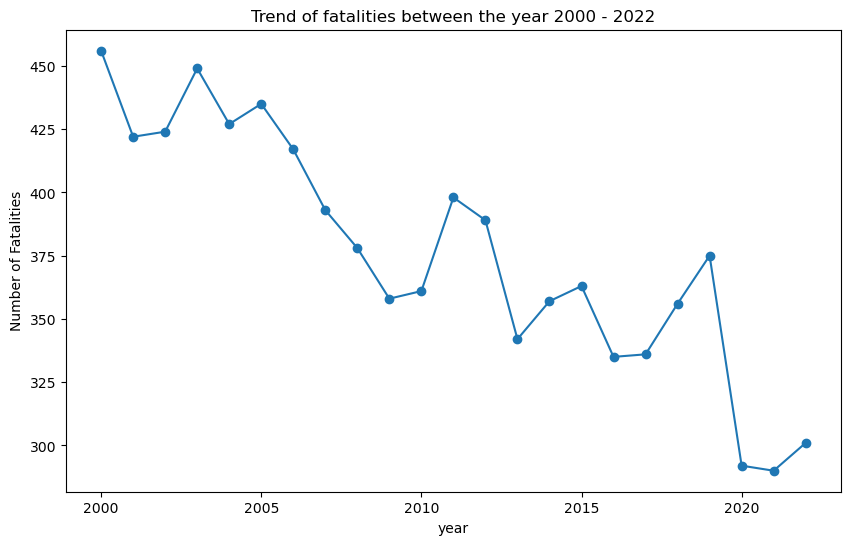

In [13]:
# create a fatalities variable
fatalities = selected_df[selected_df["Total.Fatal.Injuries"] > 0]

# group the fatalities by year 

fatalities_by_year = fatalities.groupby("year").size()

# plot the trend over the years 

plt.figure(figsize=(10,6))
fatalities_by_year.plot(kind="line", marker = "o")
plt.xlabel("year")
plt.ylabel("Number of Fatalities")
plt.title("Trend of fatalities between the year 2000 - 2022")
plt.grid = True
plt.show()



Observation

The trend of aircraft accidents that occured in the period (2000 - 2022) has continously decreased. This is probably due to improvement in aircraft technology and well trained pilots. 

In order to answer the first question of which are the top 5 types of aircrafts highly susceptible to accidents;
First bring together the "Make" and Aircraft.Category column via groupby function providing a clear view of how the selected columns relate with one another. Finally, plotting a line graph titled "Top 10 Make and Aircraft Category Combinations by Accident Count" allows for observation and development of insights 

Observing that there is a similarity in names of the make of the aircraft and the way to differentiate them is by their model category, combining the two respective columns solves this issue. First, convert all 'Make' names to lower strings (to enhance consistency in the column), then bring together the "Make" and "Model" columns into one. 

In [14]:
# convert all names to lowercase
selected_df["Make"] = selected_df["Make"].str.lower()

# combine and create a new column "Make_Model"
selected_df ["Make_Model"] = selected_df["Make"] + " " + selected_df["Model"]

C:\Users\User\AppData\Local\Temp\ipykernel_10116\2778753609.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_df["Make"] = selected_df["Make"].str.lower()
C:\Users\User\AppData\Local\Temp\ipykernel_10116\2778753609.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_df ["Make_Model"] = selected_df["Make"] + " " + selected_df["Model"]


In [15]:
selected_df = selected_df.drop(columns=["Make", "Model"])

selected_df

,Event.Date,Location,Country,Weather.Condition,Aircraft.damage,Aircraft.Category,Engine.Type,Number.of.Engines,Injury.Severity,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,FAR.Description,Broad.phase.of.flight,Purpose.of.flight,year,Make_Model
47675,2000-01-01,"HOMESTEAD, FL",United States,VMC,Substantial,unknown,Turbo Fan,2.0,Non-Fatal,0.0,0.0,0.0,3.0,unknown,Cruise,Positioning,2000,cessna 550
47676,2000-01-01,"MONTEAGLE, TN",United States,IMC,Destroyed,unknown,Reciprocating,1.0,Fatal(2),2.0,0.0,0.0,0.0,unknown,Cruise,Personal,2000,bellanca BL-17-30A
47677,2000-01-02,"VICTORVILLE, CA",United States,VMC,Substantial,unknown,Reciprocating,1.0,Non-Fatal,0.0,0.0,0.0,2.0,unknown,Cruise,Personal,2000,cessna 172G
47678,2000-01-02,"DOS PALOS, CA",United States,VMC,Substantial,unknown,Reciprocating,1.0,Non-Fatal,0.0,0.0,1.0,0.0,unknown,Cruise,Instructional,2000,cessna 172A
47679,2000-01-02,"CORNING, AR",United States,VMC,Substantial,unknown,Turbo Prop,1.0,Non-Fatal,0.0,0.0,0.0,5.0,unknown,Cruise,Personal,2000,piper PA-46-310P
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88884,2022-12-26,"Annapolis, MD",United States,unknown,unknown,unknown,NaN,NaN,Minor,0.0,1.0,0.0,0.0,091,unknown,Personal,2022,piper PA-28-151
88885,2022-12-26,"Hampton, NH",United States,unknown,unknown,unknown,NaN,NaN,NaN,0.0,0.0,0.0,0.0,unknown,unknown,unknown,2022,bellanca 7ECA
88886,2022-12-26,"Payson, AZ",United States,VMC,Substantial,Airplane,NaN,1.0,Non-Fatal,0.0,0.0,0.0,1.0,091,unknown,Personal,2022,american champion aircraft 8GCBC
88887,2022-12-26,"Morgan, UT",United States,unknown,unknown,unknown,NaN,NaN,NaN,0.0,0.0,0.0,0.0,091,unknown,Personal,2022,cessna 210N


Group the relevant columns (Make_Model and Aircraft.Category) , removing the unknown values and plot a bar chart to show the top 10 models appearing in accident report. 

In [16]:
# group the two separate columns together
makevs_cart = selected_df[selected_df["Aircraft.Category"]!= "unknown"].groupby(["Make_Model", "Aircraft.Category"]).size().reset_index(name="AccidentCount")

# sort in descending order (highest to lowest) and show the first 10

top10_makevs_cart = makevs_cart.sort_values(by="AccidentCount", ascending=False).head(10)

top10_makevs_cart


,Make_Model,Aircraft.Category,AccidentCount
2230,cessna 172,Airplane,767
1523,boeing 737,Airplane,403
2220,cessna 152,Airplane,313
2293,cessna 182,Airplane,300
2266,cessna 172S,Airplane,276
6519,piper PA28,Airplane,273
2261,cessna 172N,Airplane,247
7073,robinson R44,Helicopter,214
2278,cessna 180,Airplane,213
2260,cessna 172M,Airplane,179


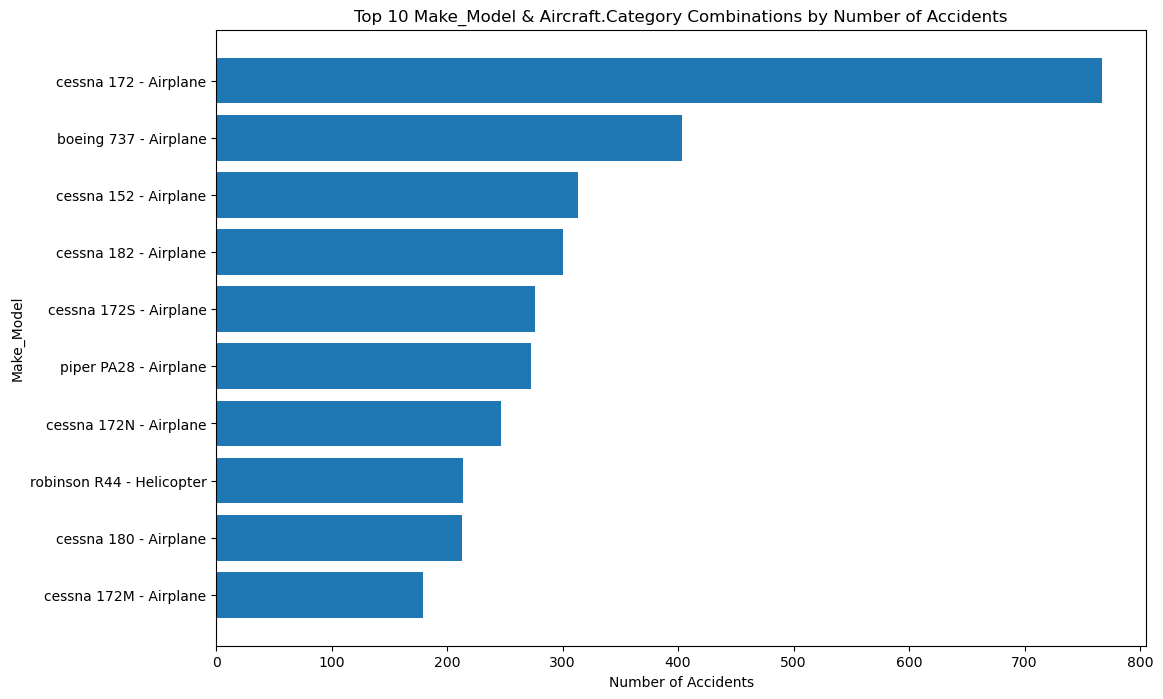

In [17]:
# Plot the data using a bar chart
plt.figure(figsize=(12, 8))
bar_plot = plt.barh(top10_makevs_cart["Make_Model"] + ' - ' + top10_makevs_cart["Aircraft.Category"], top10_makevs_cart["AccidentCount"])
plt.xlabel('Number of Accidents')
plt.ylabel("Make_Model")
plt.title('Top 10 Make_Model & Aircraft.Category Combinations by Number of Accidents')
plt.gca().invert_yaxis()  

# y-axis inverts to display the highest value at the top
plt.show()



Obsevation

Based on the chart above, it is evident that the number of cessna aircrafts reported is high. Despite this significant figures, simpleflying.com describes the cessna model as the most popular among beginner pilots due to the significant low fatalities reported. Therefore, the high number of reported accidents demonstrates how popular the aircraft is within the sector. 

Recommendation

Pier & Co Services Ltd should consider incorporating the cessna aircraft model among its fleet before expanding into the large commercial aircrafts. 

# Reviewing the safety of the make and model of air crafts.

The above chart has displayed the most popular aircraft make and model in accordance to the data set. Therefore, to understand the safety of these models, plotting a chart comparing the total fatalities to the respective make provides a clearer picture of an aircraft's model suitability.

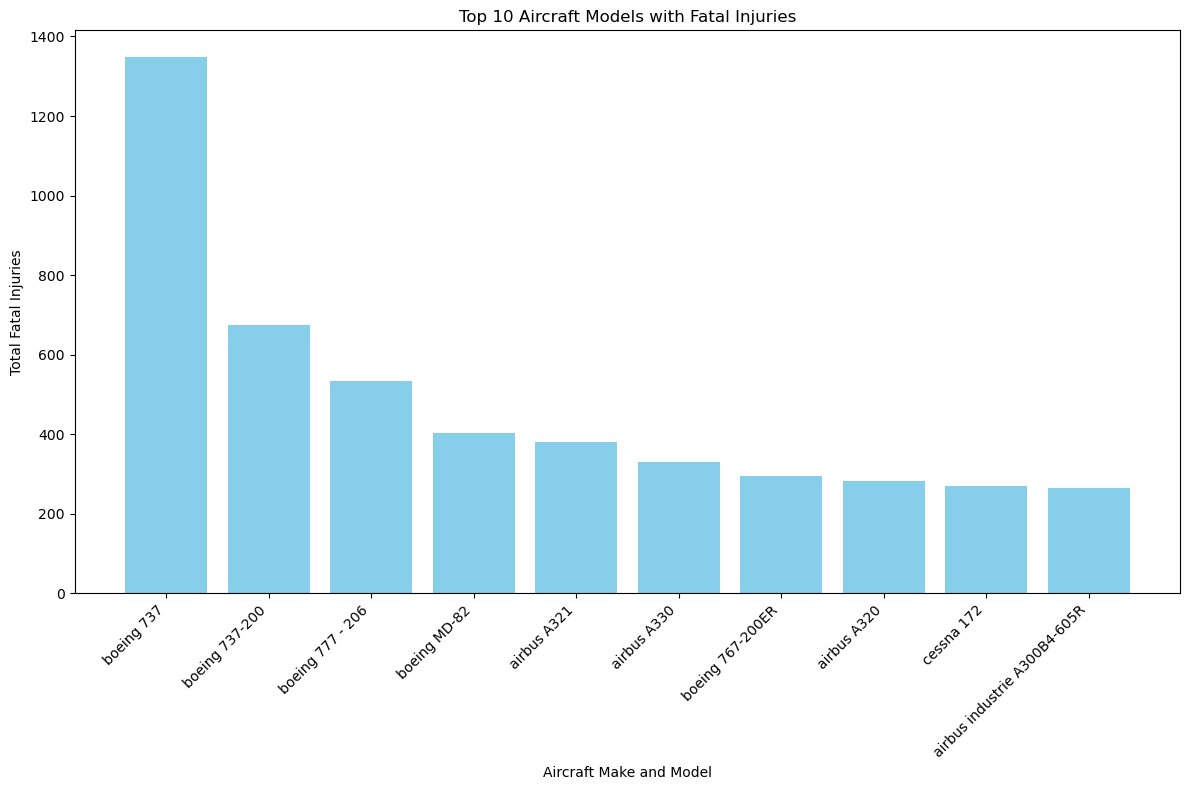

In [18]:
fatalities_group = selected_df.groupby('Make_Model')["Total.Fatal.Injuries"].sum().reset_index()

top10fatal_models = fatalities_group.sort_values(by="Total.Fatal.Injuries", ascending=False).head(10)

top10fatal_models
plt.figure(figsize=(12, 8))
plt.bar(top10fatal_models['Make_Model'], top10fatal_models["Total.Fatal.Injuries"], color='skyblue')
plt.xlabel('Aircraft Make and Model')
plt.ylabel('Total Fatal Injuries')
plt.title('Top 10 Aircraft Models with Fatal Injuries')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Observation

The bart chart above provides a summary of the top models with fatal injuries. The highest being boeing and airbus models. This explains the why most aviation stakeholders prefer the cessna models as it has better safety standards in comparison to most aircrafts. 

Recommendation

Pier & Co Services Ltd should consider the safety standards as well when acquiring a new fleet for their aircraft business. 

# Type of Engine

Engines are an imporatn aspect in airplanes and to understand which one suits the need, extracting the top five aircraft engines from the dataset proves to be an effective approach.

In [ ]:
top5_engines = selected_df["Engine.Type"].value_counts().head(5)
top5_engines

Engine.Type
Reciprocating    28486
Turbo Prop        1900
Turbo Shaft       1826
Turbo Fan         1375
Turbo Jet          283
Name: count, dtype: int64

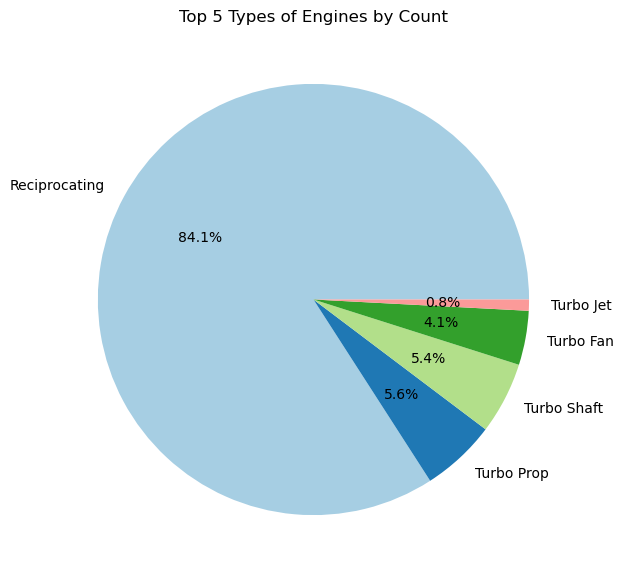

In [ ]:
# Plot pie chart
plt.figure(figsize=(10, 7))
plt.pie(top5_engines, labels=top5_engines.index, autopct='%1.1f%%', colors=plt.cm.Paired.colors)
plt.title('Top 5 Types of Engines by Count')
plt.show()

Observation 

The type of engine with the highest number of accidents reported is shown figure above to be the "Reciprocating" engine while the "Turbo jet" has the least frequency. This translates to its popularity among aviation enthusiasts. According to chapter 7 of the Federal Aviation Administration(FAA), most small aircrafts are designed with the reciprocating engine. Furthermore, the simplicity, reliability and low fuel cost factor in to how prominent this engine among small aircraft owners/airlines.  

Recommendation

As a new company, Pier and Co. Services Ltd need to consider starting out with smaller aircrafts before acquiring bigger planes with expensive maintainance costs, especially the engine. 



# Phase of Accident

Aircraft accident occur during different phases, hence the need to know the high risk phases of an aircraft' journey. 

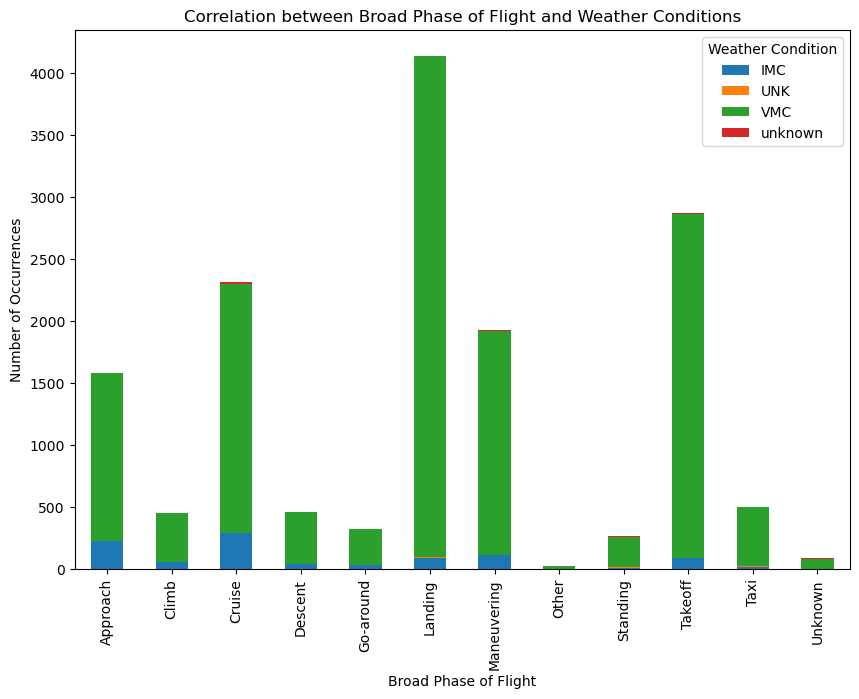

In [20]:
# use value_counts method to extract the frequently reported phases of accidents
selected_df["Broad.phase.of.flight"].value_counts()

# create a new variable and group together both columns 
# drop unknown 
phase_by_con = selected_df[selected_df["Broad.phase.of.flight"]!= "unknown"].groupby(["Broad.phase.of.flight", "Weather.Condition"]).size().unstack().fillna(0)

# plot the heatmap to demonstrate the correlation between the columns
phase_by_con.plot(kind='bar', stacked=True, figsize=(10, 7))
plt.xlabel('Broad Phase of Flight')
plt.ylabel('Number of Occurrences')
plt.title('Correlation between Broad Phase of Flight and Weather Conditions')
plt.legend(title='Weather Condition')
plt.show()

Observation

With reference to the stacked bar chart above, majority of accidents occur during landing phase and interestingly while the weather conditions are favorable (VMC). The second highest occurence is observed when air crafts are taking off within similar weather conditions. 

According to IATA 2022 Annual Safety Report, aircraft accidents taking place during landing and takeoff phases are attributed to overrun(aircraft continuing beyond the runway ) or veering out of its lateral limits.

Recommendations

Provide scenario-based training to pilots, enhancing their competencies for effective threat and management to prevent runway excursion (e.g., contaminated runway, last minute change of runway, deterioration of weather condition).

Airlines and private plane owners should explore advanced technologies such as AI-based systems which can aid aircrew in obtaining
information, and making rapid decisions.

For Airlines and Air Traffic control, they should consider recommending the execution of a go-around at any point during the approach, when there is any doubt on a safe continuation of the approach or the landing. 
